In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [326]:
dataset = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022clean.csv")

In [327]:
checkpoint = ModelCheckpoint('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_4.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [328]:
print(dataset)

        Datetime  Latitude   Longitude  Kedalaman (km)  Magnitude Type  \
0     2017-01-25   -5.3000  113.493398              12        0.0  NaN   
1     2017-01-26   -7.9900  111.200000              10        3.2  MLv   
2     2017-01-27    0.4000  118.729166              12        0.0  NaN   
3     2017-01-28   -9.4400  113.060000              10        4.7    M   
4     2017-01-29   -9.7300  112.870000              10        4.9  MLv   
...          ...       ...         ...             ...        ...  ...   
2153  2022-12-27   -7.8601  110.529800              13        1.3  MLv   
2154  2022-12-28   -8.8718  112.456500              44        3.2  MLv   
2155  2022-12-29   -9.0316  112.148100              10        3.2  MLv   
2156  2022-12-30  -10.2996  113.280300              10        3.6  MLv   
2157  2022-12-31  -10.2996  113.280300              10        3.6  MLv   

                                             Keterangan Dirasakan    M    D  \
0                               

In [329]:
train_dates = pd.to_datetime(dataset['Datetime'])

In [330]:
data = dataset[['Latitude', 'Longitude', 'Kedalaman (km)', 'Magnitude']]
values = data.values
values = values.astype('float64')

In [331]:
values.dtype

dtype('float64')

In [332]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [333]:
data_for_training = data[['Latitude', 'Longitude', 'Kedalaman (km)', 'Magnitude']].astype(float)

In [334]:
scaler = StandardScaler()
scaler = scaler.fit(data_for_training)
data_for_training_scaled = scaler.transform(data_for_training)

In [335]:
train_X = []
train_y = []

In [336]:
n_future = 1
n_past = 30

for i in range(n_past, len(data_for_training_scaled) - n_future +1):
    train_X.append(data_for_training_scaled[i - n_past:i, 0:data_for_training.shape[1]])
    train_y.append(data_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [337]:
train_X, train_y = np.array(train_X), np.array(train_y)

In [338]:
X_training, X_test, y_training, y_test  = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

In [339]:
print(X_training.shape, y_training.shape, X_test.shape, y_test.shape)

(1702, 30, 4) (1702, 1) (426, 30, 4) (426, 1)


In [340]:
print('train_X shape =={}.'.format(train_X.shape))
print('train_y shape =={}.'.format(train_y.shape))

train_X shape ==(2128, 30, 4).
train_y shape ==(2128, 1).


In [341]:
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
# Third LSTM layer
model.add(LSTM(units=48,activation='relu', return_sequences=True))
model.add(LSTM(units=32,activation='relu', return_sequences=True))
model.add(LSTM(units=16,activation='relu', return_sequences=True))
# Fourth LSTM layer
model.add(LSTM(units=16, activation='relu'))
# The output layer
model.add(Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_58 (LSTM)              (None, 30, 64)            17664     
                                                                 
 lstm_59 (LSTM)              (None, 30, 48)            21696     
                                                                 
 lstm_60 (LSTM)              (None, 30, 32)            10368     
                                                                 
 lstm_61 (LSTM)              (None, 30, 16)            3136      
                                                                 
 lstm_62 (LSTM)              (None, 16)                2112      
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 54,993
Trainable params: 54,993
Non-tra

In [342]:
optimizer=Adam(learning_rate=0.003)

In [343]:
model.compile(optimizer=optimizer, loss='mse')

In [344]:
history = model.fit(X_training, y_training, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, callbacks=[checkpoint])

Epoch 1/50



Epoch 1: val_loss improved from inf to 0.89085, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 - 5s - loss: 1.0272 - val_loss: 0.8908 - 5s/epoch - 228ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.89085 to 0.88567, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 - 2s - loss: 1.0245 - val_loss: 0.8857 - 2s/epoch - 73ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.88567 to 0.88327, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 - 2s - loss: 1.0216 - val_loss: 0.8833 - 2s/epoch - 72ms/step
Epoch 4/50

Epoch 4: val_loss improved from 0.88327 to 0.87953, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 - 2s - loss: 1.0160 - val_loss: 0.8795 - 2s/epoch - 72ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.87953 to 0.86658, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 -

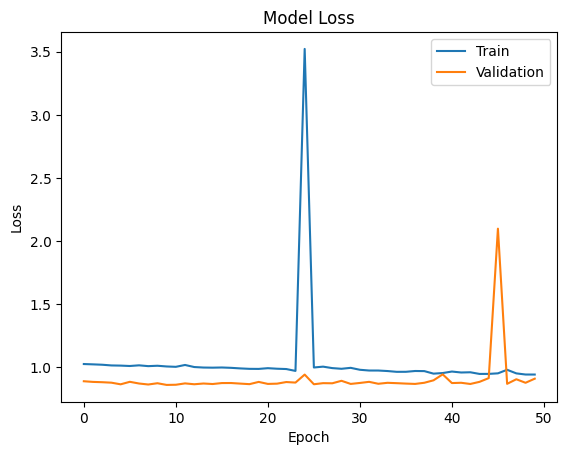

In [345]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [346]:
model = load_model("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_4.h5")
loss = model.evaluate(X_test, y_test)
print("Loss:", loss)

14/14 [==============================] - 1s 15ms/step - loss: 0.8618
Loss: 0.8617843985557556


In [347]:
n_past = 1
n_days_for_prediction=366
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='1d').tolist()
print(predict_period_dates)

[Timestamp('2022-12-31 00:00:00'), Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00'), Timestamp('2023-01-06 00:00:00'), Timestamp('2023-01-07 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-09 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-16 00:00:00'), Timestamp('2023-01-17 00:00:00'), Timestamp('2023-01-18 00:00:00'), Timestamp('2023-01-19 00:00:00'), Timestamp('2023-01-20 00:00:00'), Timestamp('2023-01-21 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-23 00:00:00'), Timestamp('2023-01-24 00:00:00'), Timestamp('2023-01-25 00:00:00'), Timestamp('2023-01-26 00:00:00'), Timestamp('2023-01-27 00:00:00'), Timestamp('2023-01-28 00:00:00'), Timestamp('20

In [348]:
prediction = model.predict(X_training[-n_days_for_prediction:])

12/12 [==============================] - 1s 15ms/step


In [349]:
print(prediction)

[[-3.60348523e-01]
 [ 1.73037961e-01]
 [ 1.15579717e-01]
 [ 4.92083132e-02]
 [-1.10778175e-01]
 [ 1.01571582e-01]
 [-3.24760854e-01]
 [ 8.74200985e-02]
 [ 1.45753533e-01]
 [-3.55724305e-01]
 [ 1.16366781e-01]
 [ 8.62610992e-03]
 [ 9.89188626e-02]
 [-8.59116018e-02]
 [ 1.00101165e-01]
 [ 1.68155730e-01]
 [-3.34316850e-01]
 [ 1.26261488e-01]
 [-2.93093264e-01]
 [ 1.15515552e-01]
 [ 1.02553971e-01]
 [ 1.80099368e-01]
 [ 6.39496669e-02]
 [ 1.61677599e-01]
 [ 1.15107335e-01]
 [ 9.42853540e-02]
 [ 6.55242726e-02]
 [-3.22785228e-01]
 [-3.72252733e-01]
 [-2.50468761e-01]
 [-1.48643225e-01]
 [-4.42152582e-02]
 [-2.96970904e-01]
 [ 1.48547143e-01]
 [ 1.56222850e-01]
 [ 1.37838408e-01]
 [ 6.75812811e-02]
 [-1.57220721e-01]
 [ 9.75178555e-02]
 [-3.67024660e-01]
 [ 1.09393708e-01]
 [ 9.44553316e-02]
 [ 1.01146750e-01]
 [ 4.33224216e-02]
 [ 1.41183645e-01]
 [-1.85733005e-01]
 [ 1.51301056e-01]
 [ 4.93341498e-02]
 [-2.11522102e-01]
 [-8.64845291e-02]
 [ 1.55518442e-01]
 [ 8.83682445e-02]
 [ 1.3717630

In [350]:
prediction_copies = np.repeat(prediction, data_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,-1]
y_pred_future = np.abs(y_pred_future)

C:\Users\wajit\AppData\Local\Temp\ipykernel_18236\1059575106.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Datetime']=pd.to_datetime(original['Datetime'])


<Axes: xlabel='Datetime', ylabel='Magnitude'>

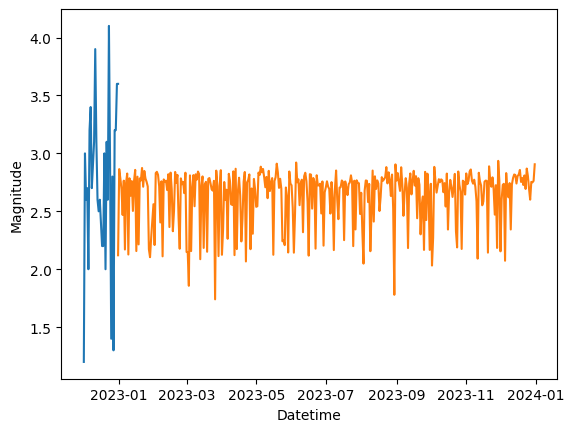

In [351]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Datetime': np.array(forecast_dates), 'Magnitude': y_pred_future})
df_forecast['Datetime'] = pd.to_datetime(df_forecast['Datetime'])


original = dataset[['Datetime', 'Magnitude']]
original['Datetime']=pd.to_datetime(original['Datetime'])
original = original.loc[original['Datetime'] >= '2022-12-1']

sns.lineplot(x=original['Datetime'], y=original['Magnitude'])
sns.lineplot(x=df_forecast['Datetime'], y=df_forecast['Magnitude'])